<a href="https://colab.research.google.com/github/Hirudika4/Image-Recognition-ML/blob/main/Image_Recognition_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hirudika4","key":"c146f428d897f639bd8640c718f2fe5d"}'}

In [3]:
!mkdir ~/.kaggle # Creating a directory make kaggle inside that
!cp kaggle.json ~/.kaggle/ # Move jaggle.json file to the directory

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


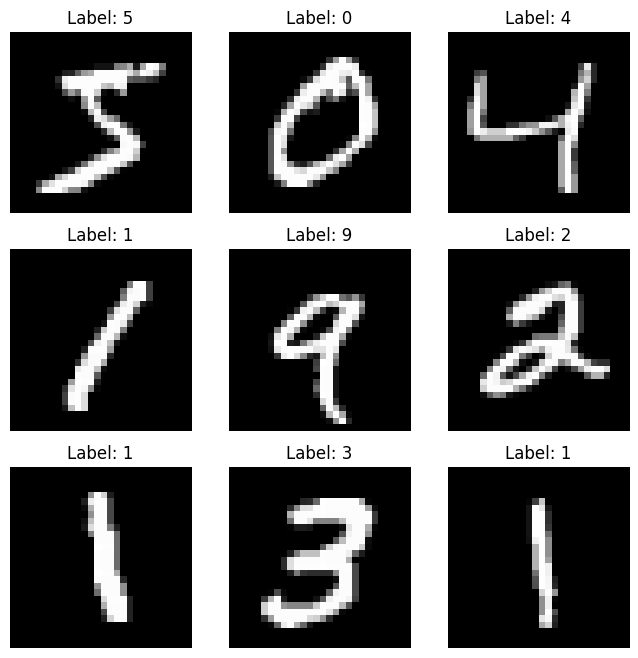

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()


In [9]:
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9014 - loss: 0.3213 - val_accuracy: 0.9830 - val_loss: 0.0598
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9847 - loss: 0.0484 - val_accuracy: 0.9867 - val_loss: 0.0431
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9899 - loss: 0.0300 - val_accuracy: 0.9878 - val_loss: 0.0446
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0222 - val_accuracy: 0.9890 - val_loss: 0.0358
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9883 - val_loss: 0.0427


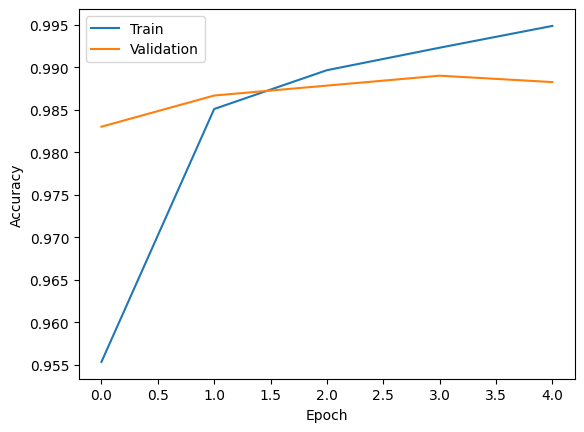

In [12]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print("Test accuracy: {test_accuracy:.4f}")
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9857 - loss: 0.0436
Test accuracy: {test_accuracy:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3),activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10, y_train_c10, batch_size=32),epochs=10,validation_data=(X_test_c10, y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.3445 - loss: 1.7763 - val_accuracy: 0.4983 - val_loss: 1.3872
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5321 - loss: 1.3170 - val_accuracy: 0.5374 - val_loss: 1.3306
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5778 - loss: 1.2019 - val_accuracy: 0.6253 - val_loss: 1.0696
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.6157 - loss: 1.1036 - val_accuracy: 0.6401 - val_loss: 1.0162
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6346 - loss: 1.0556 - val_accuracy: 0.6258 - val_loss: 1.0965
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6452 - loss: 1.0237 - val_accuracy: 0.5944 - val_loss: 1.2144
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6625 - loss: 0.9799 - val_accuracy: 0.6757 - val_loss: 0.9567
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6702 - loss: 0.96

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.87      0.80      0.83      1000
           2       0.81      0.36      0.50      1000
           3       0.57      0.45      0.51      1000
           4       0.71      0.59      0.64      1000
           5       0.78      0.47      0.58      1000
           6       0.59      0.86      0.70      1000
           7       0.65      0.79      0.71      1000
           8       0.87      0.73      0.79      1000
           9       0.50      0.95      0.66      1000

    accuracy                           0.68     10000
   macro avg       0.71      0.68      0.67     10000
weighted avg       0.71      0.68      0.67     10000



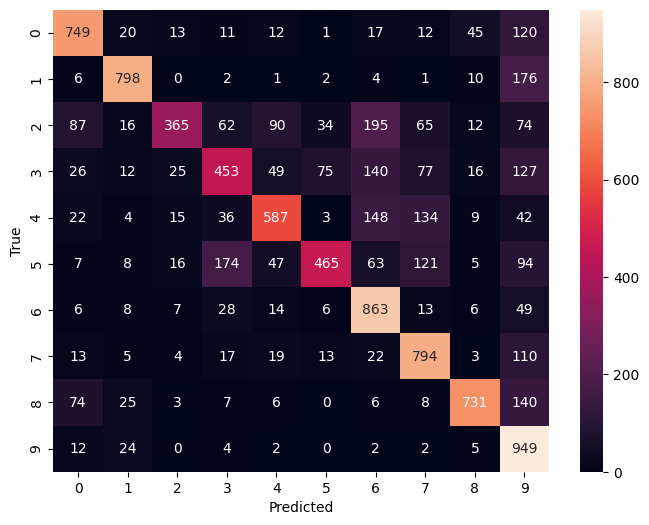

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10 = model.predict(X_test_c10).argmax(axis=1)
cm = confusion_matrix(y_test_c10, y_pred_c10)
print(classification_report(y_test_c10, y_pred_c10))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 54% 118M/218M [00:00<00:00, 1.23GB/s]
100% 218M/218M [00:00<00:00, 800MB/s] 


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 49s 159ms/step - accuracy: 0.7986 - loss: 0.5357 - val_accuracy: 0.7982 - val_loss: 0.4929
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.7919 - loss: 0.5050 - val_accuracy: 0.7985 - val_loss: 0.4827
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - accuracy: 0.8026 - loss: 0.4826 - val_accuracy: 0.7987 - val_loss: 0.4741
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - accuracy: 0.7924 - loss: 0.4801 - val_accuracy: 0.8001 - val_loss: 0.4522
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - accuracy: 0.8009 - loss: 0.4501 - val_accuracy: 0.8148 - val_loss: 0.4177


In [22]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 109s 260ms/step - accuracy: 0.7979 - loss: 0.4842 - val_accuracy: 0.8157 - val_loss: 0.4053
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.8165 - loss: 0.4310 - val_accuracy: 0.8213 - val_loss: 0.3995
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 172ms/step - accuracy: 0.8100 - loss: 0.4162 - val_accuracy: 0.8221 - val_loss: 0.3860
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.8119 - loss: 0.3959 - val_accuracy: 0.8300 - val_loss: 0.3713
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 161ms/step - accuracy: 0.8157 - loss: 0.3762 - val_accuracy: 0.8371 - val_loss: 0.3487


In [23]:
model.save('mobilenet_cats_dogs.h5')
#To Load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step


/tmp/ipython-input-1785096820.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


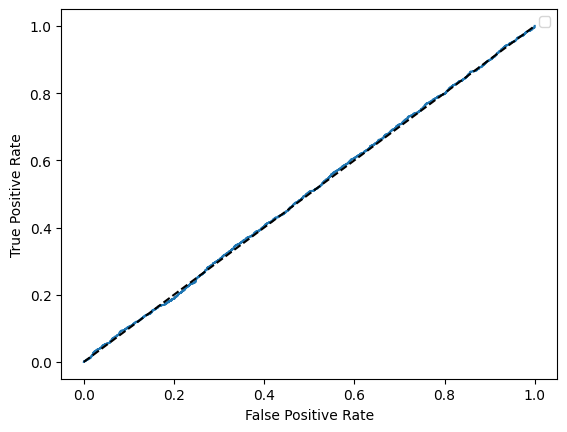

In [24]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [29]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'Lassie.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving cct.jpg to cct (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: Dog


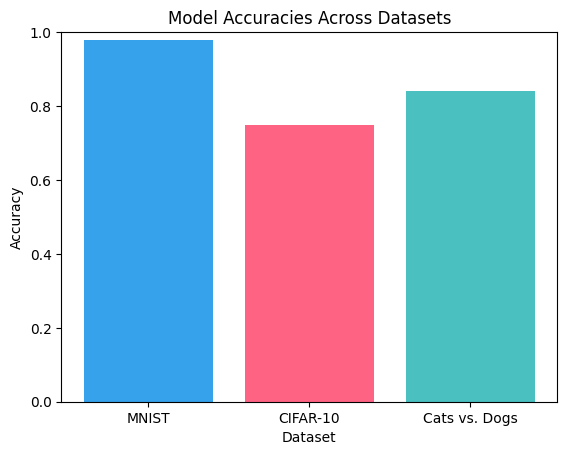

In [27]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()